In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
#1.Load the dataset into python environment

In [112]:
data=pd.read_csv(r'C:\Users\Preethy\Downloads\titanic_dataset.csv')

In [113]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [114]:
#2. Make ‘PassengerId’ as the index column

In [115]:
data=pd.read_csv(r'C:\Users\Preethy\Downloads\titanic_dataset.csv',index_col='PassengerId')

In [116]:
#3. Check the basic details of the dataset

In [117]:
data.shape

(891, 11)

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [119]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [120]:
#4. Fill in all the missing values present in all the columns in the dataset

In [121]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [122]:
numcols=data[['Age','Cabin','Embarked']]

In [123]:
numcols.isna().sum()

Age         177
Cabin       687
Embarked      2
dtype: int64

In [124]:
test_data = data[data["Age"].isnull()]
data.dropna(inplace=True)
x_train = data.drop("Age", axis=1)
x_test = test_data.drop("Age", axis=1)
y_train = data["Age"]

In [125]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [126]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [127]:
#5. Check and handle outliers in at least 3 columns in the dataset

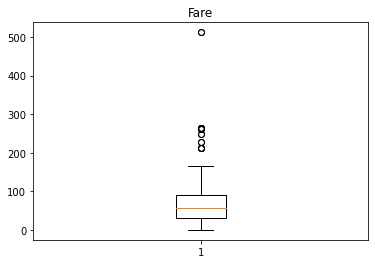

In [128]:
plt.boxplot(data['Fare'])
plt.title('Fare')
plt.show()

In [129]:
Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(data['Fare'],75,interpolation='midpoint')

In [130]:
print(Q1)
print(Q2)
print(Q3)

29.7
57.0
90.0


In [131]:
data['Fare'].median()

57.0

In [132]:
IQR=Q3-Q1

In [133]:
IQR

60.3

In [134]:
lowlim=Q1-1.5*IQR
uplim=Q3+1.5*IQR

In [135]:
lowlim

-60.749999999999986

In [136]:
uplim

180.45

In [137]:
outlier=[]
for i in data['Fare']:
    if((i>uplim) or (i<lowlim)):
        outlier.append(i)

In [138]:
outlier

[263.0,
 263.0,
 247.5208,
 247.5208,
 262.375,
 263.0,
 211.5,
 263.0,
 512.3292,
 211.3375,
 227.525,
 227.525,
 211.3375,
 512.3292,
 262.375,
 211.3375]

In [139]:
ind=data['Fare']>uplim
data.loc[ind].index

Int64Index([28, 89, 119, 300, 312, 342, 378, 439, 680, 690, 701, 717, 731, 738,
            743, 780],
           dtype='int64', name='PassengerId')

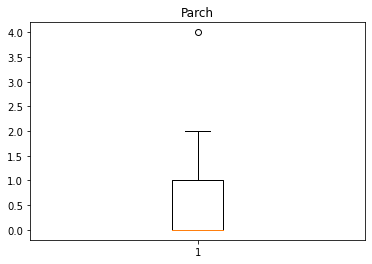

In [140]:
plt.boxplot(data['Parch'])
plt.title('Parch')
plt.show()

In [141]:
Q1=np.percentile(data['Parch'],25,interpolation='midpoint')
Q2=np.percentile(data['Parch'],50,interpolation='midpoint')
Q3=np.percentile(data['Parch'],75,interpolation='midpoint')

In [142]:
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [143]:
data['Parch'].median()

0.0

In [144]:
IQR=Q3-Q1

In [145]:
IQR

1.0

In [146]:
lowlim=Q1-1.5*IQR
uplim=Q3+1.5*IQR

In [147]:
lowlim

-1.5

In [148]:
uplim

2.5

In [149]:
outlier=[]
for i in data['Parch']:
    if((i>uplim) or (i<lowlim)):
        outlier.append(i)

In [150]:
outlier

[4]

In [151]:
ind=data['Parch']>uplim
data.loc[ind].index

Int64Index([439], dtype='int64', name='PassengerId')

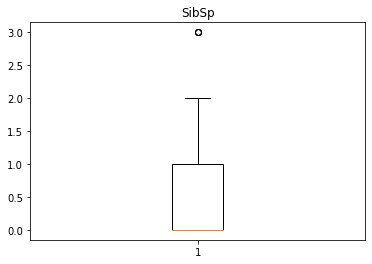

In [152]:
plt.boxplot(data['SibSp'])
plt.title('SibSp')
plt.show()

In [153]:
Q1=np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(data['SibSp'],75,interpolation='midpoint')

In [154]:
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [155]:
data['SibSp'].median()

0.0

In [156]:
IQR=Q3-Q1

In [157]:
IQR

1.0

In [158]:
lowlim=Q1-1.5*IQR
uplim=Q3+1.5*IQR

In [159]:
lowlim

-1.5

In [160]:
uplim

2.5

In [161]:
outlier=[]
for i in data['SibSp']:
    if((i>uplim) or (i<lowlim)):
        outlier.append(i)

In [162]:
outlier

[3, 3, 3]

In [163]:
ind=data['SibSp']>uplim
data.loc[ind].index

Int64Index([28, 89, 342], dtype='int64', name='PassengerId')

In [164]:
#6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [169]:
X_train, X_test, y_train, y_test = train_test_split(data, data, test_size=0.3, random_state=0)

((128, 11), (55, 11))

In [171]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler().fit(X_train[['Survived']])
X_train_copy = X_train.copy(deep=True)
X_train_copy['Survived_minmax'] = mms.transform(X_train_copy[['Survived']])
print(X_train_copy.head())

             Survived  Pclass                               Name     Sex  \
PassengerId                                                                
619                 1       2        Becker, Miss. Marion Louise  female   
246                 0       1        Minahan, Dr. William Edward    male   
537                 0       1  Butt, Major. Archibald Willingham    male   
137                 1       1       Newsom, Miss. Helen Monypeny  female   
790                 0       1           Guggenheim, Mr. Benjamin    male   

              Age  SibSp  Parch    Ticket     Fare    Cabin Embarked  \
PassengerId                                                            
619           4.0      2      1    230136  39.0000       F4        S   
246          44.0      2      0     19928  90.0000      C78        Q   
537          45.0      0      0    113050  26.5500      B38        S   
137          19.0      0      2     11752  26.2833      D47        S   
790          46.0      0      0  PC